# High Dimensional Data Analysis Day 1

# TODOS:
1. finish PCA explanation
    1. charting situation
2. add in exercises to do along the way
3. correlation heatmap (instead of current scatter plots)
4. wrap up section that points to Chris's part.
5. move all helper functions to separate file (anything that isn't about dimensions, PCA etc)



In [1]:
from sklearn import datasets
import sklearn
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
from typing import Tuple, List
import logging
import helper_functions

from IPython.core.display import HTML

logging.basicConfig(level=logging.WARNING)

%matplotlib inline

In [2]:
from traitlets.config.manager import BaseJSONConfigManager
from pathlib import Path
path = Path.home() / ".jupyter" / "nbconfig"
cm = BaseJSONConfigManager(config_dir=str(path))
cm.update(
    "rise",
    {
        "theme": "black",
        "transition": None,
        "start_slideshow_at": "selected",
        "enable_chalkboard": True,
        "chalkboard": {
            "color": ["rgb(225, 193, 7)", "rgb(30, 136, 229)"]
        },
     }
)

{'theme': 'black',
 'start_slideshow_at': 'selected',
 'enable_chalkboard': True,
 'chalkboard': {'color': ['rgb(225, 193, 7)', 'rgb(30, 136, 229)']}}

---
title: "Exploring High Dimensional Data"
teaching: 0
exercises: 5
questions:
- "Key question (FIXME)"
objectives:
- "Provide intellectual access to discussions of information-age high dimensional data(sets)"
- "Define, identify, and give examples of high dimensional datasets"
- "Summarize the dimensionality of a dataset"
- "Explain best practices for how to organize / structure high dim data for reuse"
- "Demonstrate at least one method to visualize, and explore a high-dimensional dataset"
- "Describe how high dimensional data visualization and analysis can reveal a research story in noisy data."
- "Explain how to form lower dimensional descriptions/abstractions of high dimensional data"
- "Identify and explain at least one possible method and use-case for reducing dimensionality"
keypoints:
- "First key point. Brief Answer to questions. (FIXME)"
---




## Contents of this lesson
1. Describe how high dimensional data visualization and analysis can reveal a research story in noisy data.
9. Exercise - Using your plots or new plots How can you grasp what signal is present in a 13 dimensional dataset? What does each dimension contribute?
10. Discussion: what story or stories seem to be in this data?
4. Explain how to form lower dimensional descriptions/abstractions of high dimensional data
11. Exercise - how would you simplify a dataset?
22. Are there dimensions that don’t seem to add anything?
23. What new representations could you choose?
24.  movie, radio pulses, customer dataset
5. Solution
1. Movie
1. Average color value of every frame’s px
2. reviews of the movie
2. radio signals - just take max amplitude?
3. Customer table - choose specific features?
6. Note these approaches are lossy compression

5. Identify and explain at least one possible method and use-case for reducing dimensionality
    12. PCA concept slides
    13. Visualization webpage: [https://setosa.io/ev/principal-component-analysis/](https://setosa.io/ev/principal-component-analysis/)
    14. Live coding:
        Apply PCA to breast cancer data set
    15. Exercise
    25. Apply PCA to breast cancer data set
    26. Vary parameters
    27. What effects do you notice
6. Describe how PCA can help you tell a story about a high dimensional dataset
16. Show story/signal with PCA result
28. malignant/benign definition.



# Introduction - what is high dimensional data?

# What is data?

# da·ta
/ˈdadə,ˈdādə/
_noun_
"the quantities, characters, or symbols on which operations are performed by a computer"

—Oxford Languages


(how is data formatted? structured, semi-structured, unstructured: flat file, json, raw text)

There is a conversion to numerical representation happening here

A rectangular dataset:
Original data set not rectangular, might require conversion that produces high dimensional rectangular data set.

We’re discussing structured, rectangular data only today.

# What is a dimension?

# di·men·sion
/dəˈmen(t)SH(ə)n,dīˈmen(t)SH(ə)n/

_noun_
noun: __dimension__; plural noun: __dimensions__
1. a measurable extent of some kind, such as length, breadth, depth, or height.
2. an aspect or feature of a situation, problem, or thing.

—Oxford Languages

# A Tabular/Rectangular Data Context
<!-- ![Table](../fig/day_1/tabular_data.png) -->
<p>
<center>
<img
    src = "../fig/day_1/tabular_data.png"
    alt = 'A Schematic of the arrangement of Tabular Data with columns/features rows/observations'
/>
</center>


# A Row is an Observation
<p div='image'>
<center>
<img src="../fig/day_1/tabular_data_row_highlight.png"
     />
</center>
<p>

# A Column is a Feature is a Dimension
<p>
<center>
<img src="../fig/day_1/tabular_data_dim_highlight.png"/>
</center>

1. index/n is not a dimension. but you can image another box above observation_n called 'index'
2. sometimes this will be called <index_name>_id

# Examples of datasets with increasing dimensionality

1. observations are NOT a dimension
    1. Time is a dimension - separate from n dimensions
2. Summarize the dimensionality of a dataset - every feature is a dimension


# 1 D

1. one likert scale question result

# 2 D

1. scatter plot,
2. short survey,
3. data from temperature logger, (time, value)

# 3 D

1. surface,
2. scatter plot,
3. consecutive pulses of CP 1919, TODO: put image in here
4. 2d black and white image [image, row, col]
5. moves log from a game of 'battleship' move # is not a dim! (x coord, y coord)

# 4 D
1. surface plus coloration,
2. color image data set [image, row, col, channel]
3. a movie

# 30 D

1. customer feature table: TODO: show example?
2. Brain connectivity analysis of 30 regions

# 20, 000 D - human gene expression

<p>
<center>
<img src="../fig/day_1/DNA_microarray_DrJasonKangNCIFlicker.jpg"/>
</center>


## Conceptual exercise: Discussion

* what about the data are you using? or a dataset you know about? e.g. kaggle [Titantic Dataset](https://www.kaggle.com/competitions/titanic/data)?

* how many dimensions in that data set, what are those dimensions?

In [3]:
with open('../files/day_1_titanic_table.html', 'r') as f:
    table = ''.join(f.readlines())
HTML(table)

# 14!

## Live coding: describe data set
13. Load ames housing dataset
14. demonstrate features
3. description
4. Dimensions
15. View raw data
6. Exercise: describe a data set
16. Copy live coding example
17. What’s one thing you can learn about the data?
2. Demonstrate at least one method to visualize, and explore a high-dimensional dataset:
7. Live code plotting with one of the following provided functions
8. Exercise: Plotting of discovered dimensions (provide functions)
18. Normalization
19. Correlation heat map
20. Scatter matrix
21. facet plots

# Ames housing dataset


See here python documentation: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

Also see here for more thorough documentation regarding the feature set: https://www.openml.org/d/42165

In [4]:
# load dataset
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)

In [5]:
# View data
df = housing.data
df = df.astype({'Id':int})  # set data type of Id to int
df = df.set_index('Id')  # set Id column to be the index of the DataFrame
df

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1           60.0       RL         65.0   8450.0   Pave  None      Reg   
2           20.0       RL         80.0   9600.0   Pave  None      Reg   
3           60.0       RL         68.0  11250.0   Pave  None      IR1   
4           70.0       RL         60.0   9550.0   Pave  None      IR1   
5           60.0       RL         84.0  14260.0   Pave  None      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1456        60.0       RL         62.0   7917.0   Pave  None      Reg   
1457        20.0       RL         85.0  13175.0   Pave  None      Reg   
1458        70.0       RL         66.0   9042.0   Pave  None      Reg   
1459        20.0       RL         68.0   9717.0   Pave  None      Reg   
1460        20.0       RL         75.0   9937.0   Pave  None      Reg   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence  \
Id                                    ...                                      
1            Lvl    AllPub    Inside  ...         0.0      0.0   None   None   
2            Lvl    AllPub       FR2  ...         0.0      0.0   None   None   
3            Lvl    AllPub    Inside  ...         0.0      0.0   None   None   
4            Lvl    AllPub    Corner  ...         0.0      0.0   None   None   
5            Lvl    AllPub       FR2  ...         0.0      0.0   None   None   
...          ...       ...       ...  ...         ...      ...    ...    ...   
1456         Lvl    AllPub    Inside  ...         0.0      0.0   None   None   
1457         Lvl    AllPub    Inside  ...         0.0      0.0   None  MnPrv   
1458         Lvl    AllPub    Inside  ...         0.0      0.0   None  GdPrv   
1459         Lvl    AllPub    Inside  ...         0.0      0.0   None   None   
1460         Lvl    AllPub    Inside  ...         0.0      0.0   None   None   

     MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
Id                                                                 
1           None     0.0     2.0  2008.0        WD         Normal  
2           None     0.0     5.0  2007.0        WD         Normal  
3           None     0.0     9.0  2008.0        WD         Normal  
4           None     0.0     2.0  2006.0        WD        Abnorml  
5           None     0.0    12.0  2008.0        WD         Normal  
...          ...     ...     ...     ...       ...            ...  
1456        None     0.0     8.0  2007.0        WD         Normal  
1457        None     0.0     2.0  2010.0        WD         Normal  
1458        Shed  2500.0     5.0  2010.0        WD         Normal  
1459        None     0.0     4.0  2010.0        WD         Normal  
1460        None     0.0     6.0  2008.0        WD         Normal  

[1460 rows x 79 columns]

In [6]:
# all feature names
print(df.columns.tolist())

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fen

In [7]:
# What is this housing object?
print(f'{type(housing)=}')

type(housing)=<class 'sklearn.utils.Bunch'>


In [8]:
# What can I do with a "Bunch"?
print(f'{dir(housing)=}')

dir(housing)=['DESCR', 'categories', 'data', 'details', 'feature_names', 'frame', 'target', 'target_names', 'url']


In [9]:
# keys used to store info in housing variable
print(f'{housing.keys()=}')

housing.keys()=dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


# How do I find out what these features mean? Data Dictionary

In [10]:
from IPython.display import display, Pretty

text = Pretty(
    housing.DESCR  # the housing object contains a Data Dictionary for the DataFrame
)

display(text)


Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1

In [11]:
# Ames housing data dictionary
# just here for reference, remove for lesson.
with open('../files/ames_data_dictionary.txt') as f:
    lines = f.readlines()
    for line in lines:
        print(line)

NAME: AmesHousing.txt

TYPE: Population

SIZE: 2930 observations, 82 variables



DESCRIPTIVE ABSTRACT: Data set contains information from the Ames Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, IA from 2006 to 2010.



SOURCES: 

Ames, Iowa Assessor’s Office 



VARIABLE DESCRIPTIONS:

Tab characters are used to separate variables in the data file. The data has 82 columns which include 23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables (and 2 additional observation identifiers).



Order (Discrete): Observation number



PID (Nominal): Parcel identification number  - can be used with city web site for parcel review. 



MS SubClass (Nominal): Identifies the type of dwelling involved in the sale.	



       020	1-STORY 1946 & NEWER ALL STYLES

       030	1-STORY 1945 & OLDER

       040	1-STORY W/FINISHED ATTIC ALL AGES

       045	1-1/2 STORY - UNFINISHED ALL AGES

       050	1-1/2 STORY FINISHED ALL AGES

       0

# Target Feature: SalePrice

In [12]:
df[housing.target_names[0]] = housing.target.tolist()  # add target variable 'sales price' to data df from housing object
df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

In [13]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

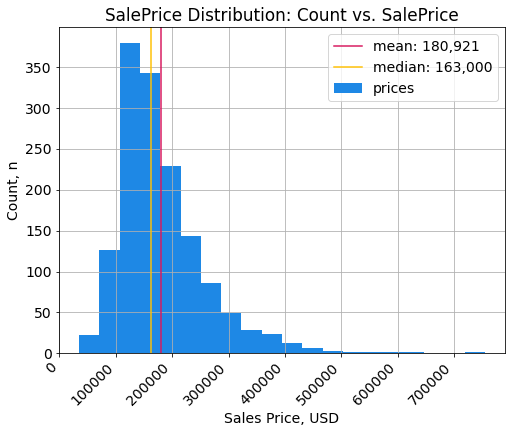

In [14]:
helper_functions.plot_salesprice(df)

# Dataset Dimensions

In [15]:
df.describe()  # careful, non-numerical columns are excluded!

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

In [16]:
# DataFrame dimensions
print(f"{df.shape=}")

df.shape=(1460, 80)


# Curse of Dimensionality

1. 1460 observations
2. 79 features

Can all of those features be used in a model?

Would you want to use all of those features?

In [17]:
# two quick, but not generally applicable rules of thumb:
# TODO: if you mention, mention why they are considered rules of thumbs
import math
print('by square root of number of observerations: {:.2f}'.format(
    math.sqrt(housing.data.shape[0])
    )
)
print('')
print('one order of magnitude less than number of observations: {:.2f}'.format(
    1460/10
    )
)


by square root of number of observerations: 38.21

one order of magnitude less than number of observations: 146.00


# keep in mind...
1. data analysis and mdoeling can be very emprical - you need to try things out to see what works
2. if your data is iid or not, will impact how many obs

# Generally for a classifcation model

1. Distribution of features per target class matters a ton
2. More features mean more data

# Create Two Classes: Bottom and Top 30 % SalePrice

# This is data exploration still

In [18]:
df = helper_functions.split_df(df, split_col='SalePrice', top_split=10)

In [19]:
pd.concat([
    df[df['top_10']].head(10),
    df[~df['top_10']].head(10)
])

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
7         20.0       RL         75.0  10084.0   Pave  None      Reg   
12        60.0       RL         85.0  11924.0   Pave  None      IR1   
14        20.0       RL         91.0  10652.0   Pave  None      IR1   
21        60.0       RL        101.0  14215.0   Pave  None      IR1   
28        20.0       RL         98.0  11478.0   Pave  None      Reg   
36        60.0       RL        108.0  13418.0   Pave  None      Reg   
46       120.0       RL         61.0   7658.0   Pave  None      Reg   
54        20.0       RL         68.0  50271.0   Pave  None      IR1   
59        60.0       RL         66.0  13682.0   Pave  None      IR2   
66        60.0       RL         76.0   9591.0   Pave  None      Reg   
1         60.0       RL         65.0   8450.0   Pave  None      Reg   
2         20.0       RL         80.0   9600.0   Pave  None      Reg   
3         60.0       RL         68.0  11250.0   Pave  None      IR1   
4         70.0       RL         60.0   9550.0   Pave  None      IR1   
5         60.0       RL         84.0  14260.0   Pave  None      IR1   
6         50.0       RL         85.0  14115.0   Pave  None      IR1   
8         60.0       RL          NaN  10382.0   Pave  None      IR1   
9         50.0       RM         51.0   6120.0   Pave  None      Reg   
10       190.0       RL         50.0   7420.0   Pave  None      Reg   
11        20.0       RL         70.0  11200.0   Pave  None      Reg   

   LandContour Utilities LotConfig  ... PoolQC  Fence MiscFeature MiscVal  \
Id                                  ...                                     
7          Lvl    AllPub    Inside  ...   None   None        None     0.0   
12         Lvl    AllPub    Inside  ...   None   None        None     0.0   
14         Lvl    AllPub    Inside  ...   None   None        None     0.0   
21         Lvl    AllPub    Corner  ...   None   None        None     0.0   
28         Lvl    AllPub    Inside  ...   None   None        None     0.0   
36         Lvl    AllPub    Inside  ...   None   None        None     0.0   
46         Lvl    AllPub    Inside  ...   None   None        None     0.0   
54         Low    AllPub    Inside  ...   None   None        None     0.0   
59         HLS    AllPub   CulDSac  ...   None   None        None     0.0   
66         Lvl    AllPub    Inside  ...   None   None        None     0.0   
1          Lvl    AllPub    Inside  ...   None   None        None     0.0   
2          Lvl    AllPub       FR2  ...   None   None        None     0.0   
3          Lvl    AllPub    Inside  ...   None   None        None     0.0   
4          Lvl    AllPub    Corner  ...   None   None        None     0.0   
5          Lvl    AllPub       FR2  ...   None   None        None     0.0   
6          Lvl    AllPub    Inside  ...   None  MnPrv        Shed   700.0   
8          Lvl    AllPub    Corner  ...   None   None        Shed   350.0   
9          Lvl    AllPub    Inside  ...   None   None        None     0.0   
10         Lvl    AllPub    Corner  ...   None   None        None     0.0   
11         Lvl    AllPub    Inside  ...   None   None        None     0.0   

   MoSold  YrSold  SaleType  SaleCondition  SalePrice  top_10  
Id                                                             
7     8.0  2007.0        WD         Normal   307000.0    True  
12    7.0  2006.0       New        Partial   345000.0    True  
14    8.0  2007.0       New        Partial   279500.0    True  
21   11.0  2006.0       New        Partial   325300.0    True  
28    5.0  2010.0        WD         Normal   306000.0    True  
36    9.0  2006.0        WD         Normal   309000.0    True  
46    2.0  2010.0        WD         Normal   319900.0    True  
54   11.0  2006.0        WD         Normal   385000.0    True  
59   10.0  2006.0       New        Partial   438780.0    True  
66   10.0  2007.0        WD         Normal

In [20]:
# create one 'hues' value for top 30 and anothr for everything else - for plotting
df['hue'] = [1 if x else 0 for x in df['top_10']]

In [21]:
# choose numerical features to compare
cols = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'SalePrice', 'BsmtFinSF1', 'MSZoning',
        'hue']

In [22]:
# pull Chris E's jekyll lesson and notebook, compare notes.

# Plot correlations and histograms of those columns

1. What features should go in a model to predict high house price?

2. What features are correlated with high house price?

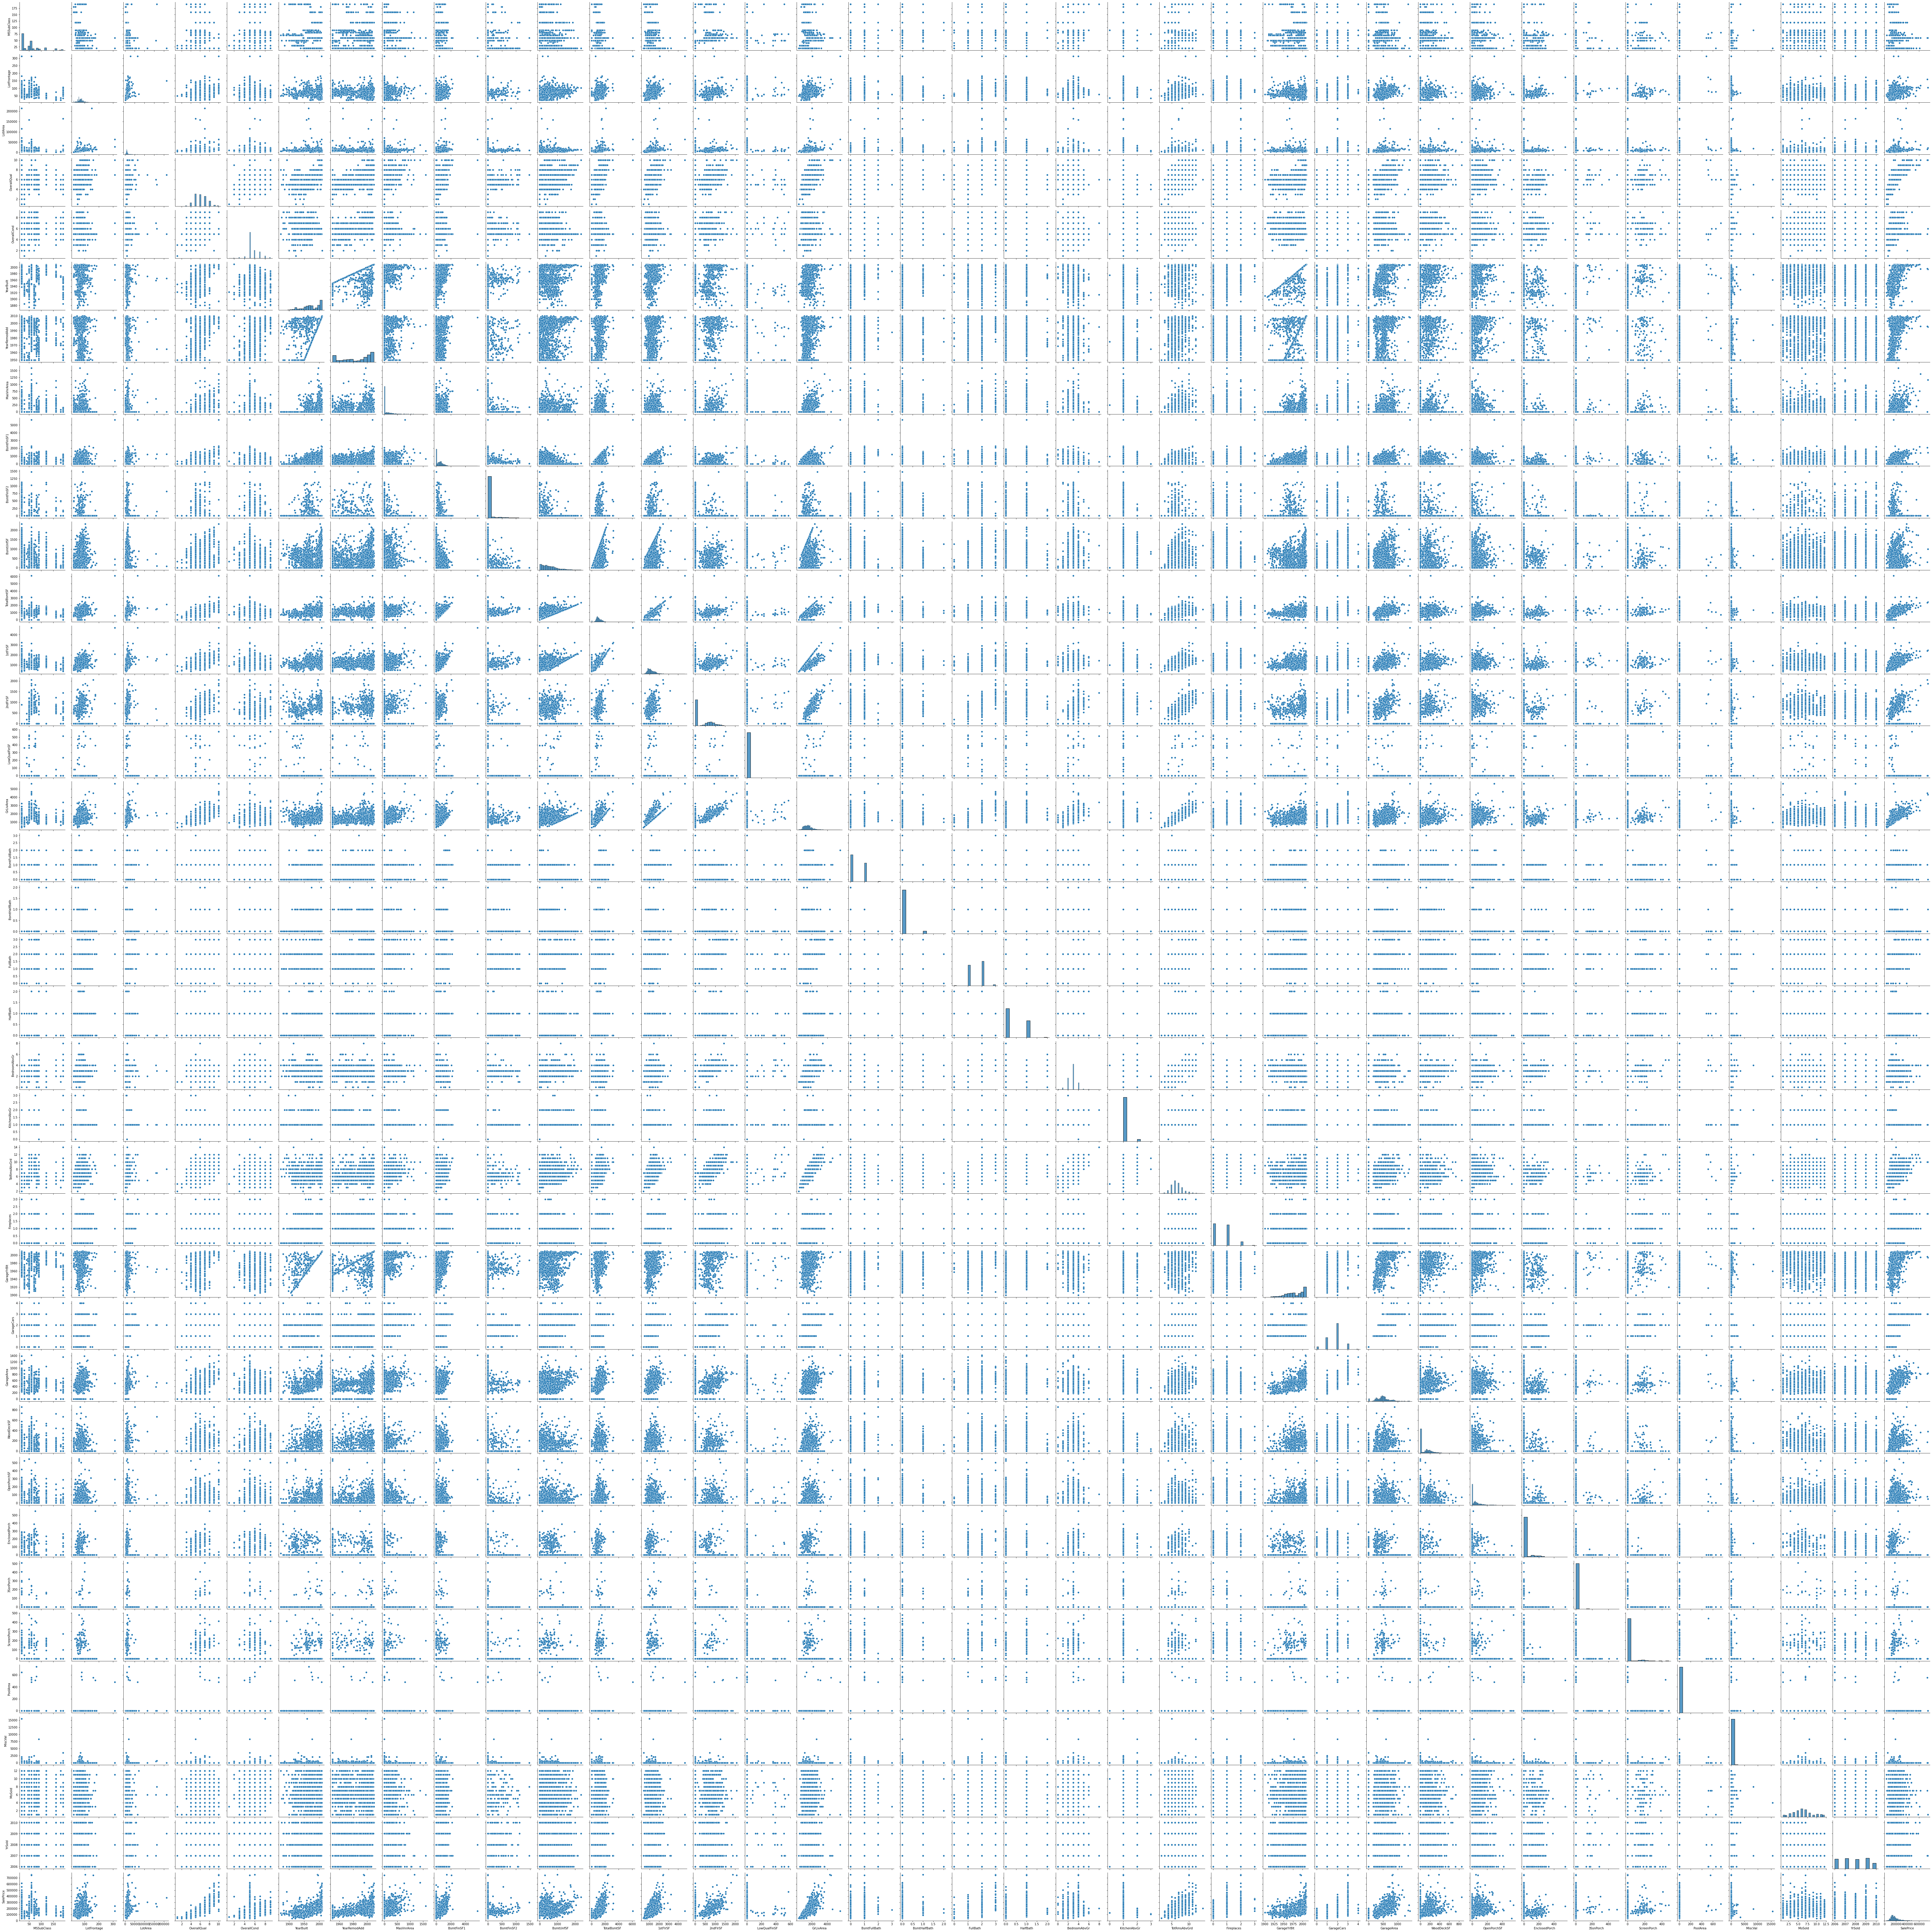

In [23]:
# if you compared every column:
# TODO: replace with correlation heatmap
from IPython.display import Image
Image('../fig/day_1/ames_total_pairplot.png')

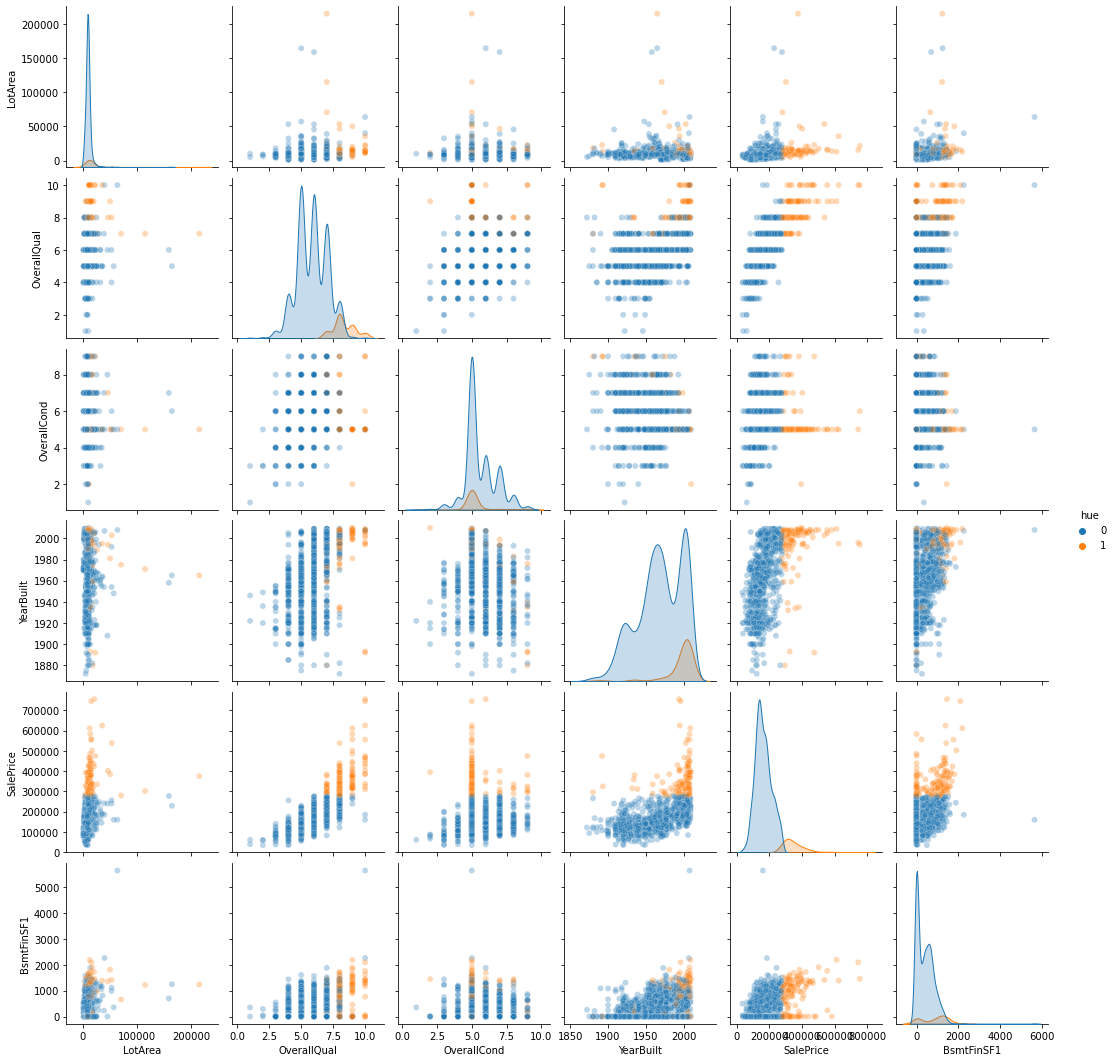

In [24]:
# Plot correlations and histograms of those columns, color with hue. This might take a while.
import seaborn as sns
sns.pairplot(
    df[cols],
    hue='hue',
    dropna=True,
    plot_kws={'alpha': 0.3}
)
plt.show()

# Situation: create model to classify if house top 10 % or not

1. model w/ all
2. model w/ arbitrary columns that look good <- top 10 features most correlated w/ sales price
3. vs. model w/ PCA result


In [25]:
numeric_cols = df.describe().columns.tolist()
df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

       OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.660274      21.954110     3.409589    15.060959     2.758904   
std      66.256028      61.119149    29.317331    55.757415    40.177307   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     0.000000   
50%      25.000000       0.000000     0.000000     0.000000     0.000000   
75%      68.000000       0.000000     0.000000     0.000000     0.000000   
max     547.000000     552.000000   508.000000   480.000000   738.000000   

            MiscVal       MoSold       YrSold      SalePrice          hue  
count   1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  
mean      43.489041     6.321918  2007.815753  180921.195890     0.100685  
std      496.123024     2.703626     1.328095   79442.502883     0.301014  
min        0.000000     1.000000  2006.000000   34900.000000     0.000000  
25%        0.000000     5.000000  2007.000000  129975.000000     0.000000  
50%        0.000000     6.000000  2008.000000  163000.000000     0.000000  
75%        0.000000     8.000000  2009.000000  214000.000000     0.000000  
max    15500.000000    12.000000  2010.000000  755000.000000     1.000000  

[8 rows x 38 columns]

# Enter PCA

In [26]:
# were those the best columns?
# create dummy variables?

# feature array
with pd.option_context('max_columns', None):
    cols_to_drop = ['GarageYrBlt', 'LotFrontage', 'MasVnrArea', 'SalePrice', 'hue']
    X = df[numeric_cols].drop(cols_to_drop, axis=1)
#    y = df['SalePrice'].tolist()
    y = df['top_10'].tolist()

    print(X[X.isna().any(axis=1)])

Empty DataFrame
Columns: [MSSubClass, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold]
Index: []


NameError: name 'components' is not defined

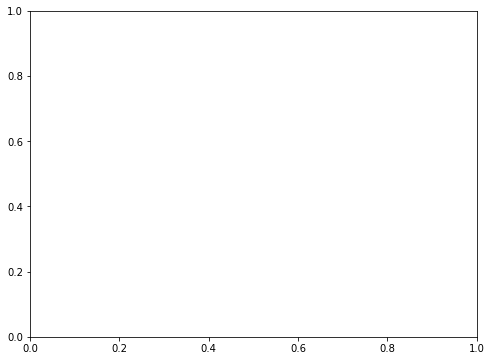

In [27]:
# how does this line up with sales price like that? Seems like the coloration is incorrect!
fig, ax = plt.subplots(1,1, figsize=(8,6))
scatter_plot = ax.scatter(components[:,0], components[:,1],
                          c=y,
                          cmap='flag',
                          alpha=0.3)
ax.set_title('scatter plot of pc1 vs pc0 shaded by SalePrice')
ax.set_xlabel('pc0')
ax.set_ylabel('pc1')
# plt.colorbar(scatter_plot)
plt.show()

# What Just Happenned!?

PCA is a __DIMENSIONALITY REDUCTION METHOD__ that lets you transform many dimensions in to fewer dimesions while still retaining most of the information from the original dimenions.

Trade accuracy for simplicity

Fewer dimensions means easier to: 
1. explore
2. process
3. vizualize

but, *harder* to interpret.

Another way to think about it, we're rotating the existing axes (dimensions) to new ones that are aligned with the greatest variance ('explainability') in the data.  


# Steps of PCA
We'll use some words you might not be familiar with - hang in there it's easier than it seems.
1. __standardize__
2. __compute covariance matrix__ - ID correlations
3. __compute eigenvectors and eigenvalues__ of the covariance matrix - ID principal components
4. __create a feature vector__ to decide which prinicpal components ot keep
5. __recast the data__ along the principle component axes

# Step One: Standardize

## Why?
1. standardize continuous variables' scales, so all contribute equally to the following steps.
2. variance of initial variable matters.
    1. a: 1 - 100000
    2. b: 0-0.1
    3. PCA without standardization will have a dominate over b
    


# Standardize

## How?

_z = (value - mean) / (standard deviation)_

each value is now zero centered, standard deviation = 1

Note, each variable will retain it's original relative distribution.



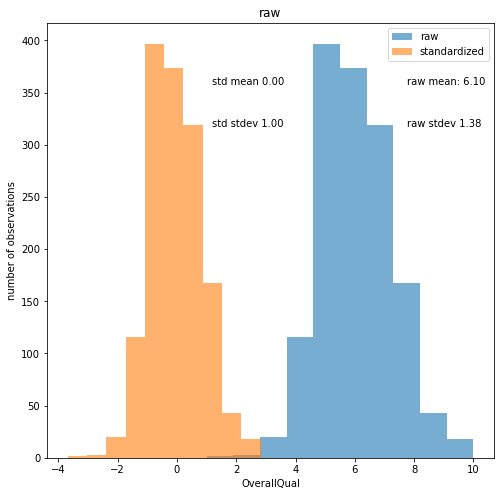

In [28]:
# Note how the axes have changed, 
# but the shape of the relative shape of the data hasn't.
helper_functions.demo_standardization('OverallQual', df)

# Step Two: Compute Covariance Matrix

1. how do our input data dimensions vary from the mean with respect to each other?
2. i.e. are they related?
3. highly correlated variables are redundant
4. The Covariance Matrix will tell us

# Compute Covariance Matrix

_p x p_ where _p_ is number of input dimensions

|  | x| y| z|
|--|--|--|--|
|x |Cov(x, x)| Cov(x, y) | Cov(x, z) |
|y |Cov(y, x)| Cov(y, y) | Cov(y, z) |
|x |Cov(y, x)| Cov(z, y) | Cov(z, z) |


_Cov(x,x) == Variance(x)_ the diagonal is each variable's variance

_Cov(x,y) == Cov(y,x)_ the matrix is symmetrical around the diagonal

positive covariance = correlated
negative covariance = inversely correlated

# Covariance formula for reference
Cov(x, y) = ∑(x<sub>i</sub>-x̄)(y<sub>j</sub>-ȳ) / n - 1


# Step Three: Compute Eigenvectors and Eigenvalues

1. linear algebra concepts needed to calculate principal components
2. principal components:
    1. new variables that are linear combinations or mixtures of initial variables
    2. these new variables/principal components are built so:
        1. they are not correlated
        2. most of the information in the original variables is in the first few new variables
        3. a 10 dim data set would give 10 possible prinicple components
        4. BUT PCA tries to put as much information as possible in the first component
        5. then as much of the remaining information as possble in the second component, and so on




plot of PC % explained variance here?

1. __There are as many PCs are variables in the data__

2. NB: these new combo variables/principle components are hard to interpret because of that linear combination.

3. think of PC as being a direction through the data that explains the maximum variance/captures the most information. 

4. more variance, more dispertion along that line, the more info there is

5. i.e. a PC is a new axis that has the best angle to see/eval the data so that differences between obs are more visible


# Finding The First Principle Component

The line through all the data with the __largest possible variance__ 


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

def create_feature_data() -> np.ndarray:
    X1, Y1 = make_classification(
        n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1
    )

    feature_1 = [x for x, y in zip(X1, Y1) if y == 0 ]  
    return np.stack(feature_1)


def scatter_plot_with_1_deg_poly_fit(feature_1: np.ndarray,
                                     axlims: Tuple[float, float]=None
                                    ) -> plt.Figure:
    plt.figure(figsize=(8, 8))
    plt.title("Random data w/ 1 degree polynomial fit")

    poly = np.polynomial.Polynomial.fit(feature_1[:, 0], feature_1[:, 1], deg=1)

    plt.scatter(feature_1[:, 0], feature_1[:, 1], marker="o", s=25, edgecolor="k", label='random data')
    plt.plot(feature_1[:, 0], poly(feature_1[:, 0]), label='1 degree polynomial fit')
    plt.legend()
    plt.xlim(axlims)
    plt.ylim(axlims)
    return plt.Figure


def scatter_plot_with_projection(feature_1: np.ndarray,
                                 poly: np.polynomial.Polynomial = None,
                                 ax:plt.Axes = None,
                                 axlims: Tuple[float, float] = None
                                 ) -> plt.Axes:
    
    # fig, ax = plt.subplots(1,1, figsize=(8,8))
    if ax is None:
        ax=plt.gca()
    ax.set_title("Random data w/ projections to 1st degree polynomial fit")

    # create pc line and data projections on to that line
    if not poly:
        poly = np.polynomial.Polynomial.fit(feature_1[:, 0], feature_1[:, 1], deg=1)
    proj_points = all_points_projection(feature_1, poly)
    
    # draw lines between data points and projection points
    lines = [[(f[0], f[1]), (p[0], p[1])] for f, p in zip(feature_1, proj_points)]
    lc = mpl.collections.LineCollection(lines, color='orange')


    # plot data, poly fit, and lines from data to projection on poly fit
    ax.scatter(feature_1[:, 0], feature_1[:, 1], marker="o", s=25, edgecolor="k")
    ax.plot(feature_1[:, 0], poly(feature_1[:, 0]), label='1 degree polynomial fit')
    ax.add_collection(lc)
    
    if axlims:
        ax.set_ylim(axlims)
        ax.set_xlim(axlims)
    
    # force plot to be square
    plt.ylim(plt.xlim())

    return ax


def ClosestPointOnLine(p, poly):
    a = np.array([feature_1[0, 0], poly(feature_1[0, 0])])
    b = np.array([feature_1[0, -1], poly(feature_1[0, -1])])
    
    print(f'{p=}, {a=}, {b=}')
    
    ap = p-a
    ab = b-a
    result = a + np.dot(ap,ab)/np.dot(ab,ab) * ab
    return result


def projection(p3: Tuple[float, float], poly: np.polynomial.Polynomial):
    """return projected point of p3 onto line of poly"""
    
    # make p1 and p2 max x-extents of data
    max_x = np.max()
    min_x = np.min()
    p1 = np.array([feature_1[0, 0], poly(feature_1[0, 0])])
    p2 = np.array([feature_1[0, -1], poly(feature_1[0, -1])])
    
    # confirm points from poly being used for projection
    plt.scatter([p1[0], p2[0]],
                [p1[1], p2[1]],
                marker='o', edgecolor='k',
                c='red')

    
    # caluclate l2
    l2 = np.sum((p1 - p2) ** 2)
    if l2 == 0:
        logging.warning('p1 and p2 are the same point')
    

    # calculate t (angent?)
    t = np.sum((p3 - p1) * (p2 - p1)) / l2
                   
    if t > 1 or t < 0:
        print('p3 does not project onto p1-p2 line segment')
        
    # calculate point projected on to poly-fit           
    proj = p1 + t * (p2 - p1)   
        
    return proj


def all_points_projection(data: np.ndarray, 
                          poly: np.polynomial.Polynomial) -> np.ndarray:
    """return projected points of all points in 'data' onto line of poly"""
    
    # make p1 and p2 max x-extents of data
    max_x = np.max(data[:,0])
    min_x = np.min(data[:,0])
    p1 = np.array([min_x, poly(min_x)])
    p2 = np.array([max_x, poly(max_x)])
    
    # calculate l2
    l2 = np.sum((p1 - p2) ** 2)
    if l2 == 0:
        logging.warning('p1 and p2 are the same point')

    proj_points = []
    for p3 in data:
        # TODO: vectorize
        # calculate t
        t = np.sum((p3 - p1) * (p2 - p1)) / l2

        if t > 1 or t < 0:
            print('p3 does not project onto p1-p2 line segment')

        # calculate point projected on to poly-fit           
        proj = p1 + t * (p2 - p1)   
        proj_points.append(proj)

    return np.vstack(proj_points)

In [ ]:
# Here is a random data feature, re-run until you like it:
def create_feature_scatter_plot() -> Tuple[np.ndarray, Tuple[float, float]]:
    feature_data = create_feature_data()
    fig, ax = plt.subplots(1,1, figsize=(8, 8))
    plt.scatter(feature_data[:,0], feature_data[:,1])
    # ensure square plot
    xlims = ax.get_xlim()
    ylims = ax.get_ylim()
    min_ax_val = min(xlims[0], ylims[0])
    max_ax_val = max(xlims[1], ylims[1])
    ax.set_xlim(min_ax_val, max_ax_val)
    ax.set_ylim(min_ax_val, max_ax_val)
    # label and plot
    ax.set_title('random feature data scatter plot')
    ax.set_xlabel('feature x value, arbitrary units')
    ax.set_ylabel('feature y value, arbitrary units')
    plt.show()
    return feature_data, (min_ax_val, max_ax_val)

feature, axlims = create_feature_scatter_plot()

### What is the line of best fit through this data?

In [ ]:
ax = scatter_plot_with_1_deg_poly_fit(feature, axlims)

## How do we know this line has the most variance?

1. if you project each data point on to that line of best fit
2. then the sum of the distances of those projected points to the center of the line is the variance.
3. more distance, more variance.
4. most distance, most variance.

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax = 
ax = scatter_plot_with_projection(feature, ax=ax, axlims=axlims)
plt.show()

In [ ]:
poly = np.polynomial.Polynomial.fit(feature[:, 0], feature[:, 1], deg=1)
m, b = poly.coef
# ortho_poly = np.polynomial.Polynomial.fit(feature[:, 0], 
#                                           feature[:, 0] * -m + b*2, 
#                                   deg=1)

def new_line(m, x, b) -> float:
    return m * x + b

def orthogonal_line(feature, slope) -> Tuple[List[float], List[float]]: 
    perpendicular_slope = -(1/slope)
    x_center_point = sum(feature[:, 0]) / len(feature[:, 0])
    y_center_point = sum(feature[:, 1]) / len(feature[:, 1])
    constant = y_center_point - (perpendicular_slope * x_center_point)

    max_x = max(feature[:, 0])
    max_y = perpendicular_slope * max_x + constant
    min_x = min(feature[:, 0])
    min_y = perpendicular_slope * min_x + constant
    return [min_x, max_x], [min_y, max_y]

ortho_x, ortho_y = orthogonal_line(feature, m)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
scatter_plot_with_projection(feature, ax=ax)
ax.plot(ortho_x, ortho_y, color='green')
#scatter_plot_with_projection(feature, poly=ortho_poly, ax=ax)
plt.show()


The line through all the data with the __largest possible variance__ 

i.e. the average of the squared distances from the projected points to the origin.

The second PC is found in the same way 
    - with the condition that it is perpendicular to the first PC
   
Keep going in that was till # PCs = # dimensions/variables


## eigenvectors and eigenvalues
alwyas come in pairs - every eigenvector has an eigen value
one for every dimension
10 dimensions, 10 eigenvectors with 10 eigen values.

the eigenvectors for the covariance matrix are the directions of the axes where there is the most variance, i.e. a Principle Component. An eigenvalue is a coefficient attached to an eigenvector - the amount of variance in each principle component

rank eigenvectors by eigenvalues and you get PCs in order of significance.

% of variance caluclated by eigenvalue/sum(eigenvalues)

## Feature vector
choose which PCs to keep (discard low eigenvalue PCs)
form a matrix of vectors with the PCs you keep: the feature vector.

a matrix w/ columns == eigenvectors of the kept PCs.

dimensionality reduction is happening here

fewer kepts PCs means feature dimensions.

lose that % of information (hopefully small), but get reduced complexity


## Recast the Data
Recast the data along the principle component axes
to this point no change in the data (unless you count the standardization)
now use the feature vector to reorient the data
    from original axes to the ones represented by the PCs
achieve this by multiplying the the transpose of the original dataset
with the transpose of the feature vector

final_dataset = feature_vector<sup>T</sup> * standardized_original_dataset<sup>T</sup>

In [ ]:
# let's walk back through our example now to show what happened.

In [ ]:
from sklearn.decomposition import PCA
p = PCA(n_components=len(X.columns.tolist()))
p.fit(X)

In [ ]:
def plot_eigenvectors(p: sklearn.decomposition._pca.PCA) -> Tuple[plt.Figure, plt.Axes]:
    print(f'{p.components_.shape=}')
    fig, ax = plt.subplots(1,1)
    im = ax.pcolormesh(abs(p.components_.T), norm=mpl.colors.LogNorm(vmin=1e-6))
    ax.set_title('heat map of absolute values of PCA eigenvectors')
    ax.set_ylabel('eigenvector value')
    ax.set_xlabel('eigenvector')
    plt.colorbar(im)
    return plt.Figure, plt.Axes

In [ ]:
plot_eigenvectors(p)
plt.show()

In [ ]:
p = PCA(n_components=2)
p.fit(X)

In [ ]:
plot_eigenvectors(p)
plt.show()
# make sure fit doesn't have target value in it!!
# ensure column names are what you want
# don't fit on non-numerics, non-nans
# plot out eigenvector plots w/ column names (for top x variables...)
# point out properties of the plot:
# What is each vector highlighting?
# many small values - many variables are correlated
# see if stronger vals correlate with top 30 / bottom 30 analysis.

In [ ]:
cols_i_care_about = [x for x in numeric_cols if x not in ['GarageYrBlt', 'LotFrontage', 'MasVnrArea', 'SalePrice', 'hue']]
for v in p.components_:
    v = abs(v)
    max_v = max(v)
    idx = v.tolist().index(max_v)
    print(max_v, idx, cols_i_care_about[idx])

In [ ]:
for i, x in enumerate(df.columns.tolist()):
    print(i, x)

In [ ]:
# eigenvectors (what is being used to transform the data)
import matplotlib as mpl


plot_eigenvectors(p)
plt.show()


In [ ]:
components = p.transform(X)
components.shape

In [ ]:
# WHAT JUST HAPPENED?

# what did PCA just do?

# (it's not magic)

In [ ]:
# plot explained_variance_ratio - how well do the two components explain variance?
component_df = pd.DataFrame(
    {
        'pc0':p.explained_variance_ratio_[0],
        'pc1':p.explained_variance_ratio_[1]
    },
    index=[0]
)

fig, ax = plt.subplots(1,1,figsize=(8,6))
sns.barplot(data=component_df, ax=ax)
ax.set_title("bar plot of principal components' explained variance ratios")
ax.set_xlabel('principal component')
ax.set_ylabel('explained variance ratio')
plt.show()

In [ ]:
# what do those two components look like?
# plot the components PC0 and PC1 as a two category histogram

with mpl.rc_context({'font.size': 14}):
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    sns.histplot(pd.DataFrame(components,
                              columns=['pc0','pc1']),
                              bins=100,
                              ax=ax,
                              palette=sns.color_palette('Accent')[:2])
    ax.set_xlabel('component value')
    plt.xticks(rotation='45', ha='right')
    plt.show()


In [ ]:
# Wrap up section
what discussed today:
    1.
    2.
    3.

# OLD - Breast Cancer Data look at a high dimensional dataset

In [ ]:
data = datasets.load_breast_cancer()

In [ ]:
print(f'data set data type: {type(data)}')
print()
print(f'data set options: {dir(data)}')
print()
print([k for k in data.keys()])


In [ ]:
# loaed data
# now explore it - hint functions
# what can you discover?
# if yowuanted to PCA this data, what would you need to know?

# put code in lesson structure
# add in text/markdown between to fill out lesson structure around code

In [ ]:
print(data.DESCR)

## conceptual exercise
what is this dataset? what questions can be answered? what stories can be told? what limitations are there? EDA MOMENT

## how to understand this data?

In [ ]:
df = pd.DataFrame(data.data)
df

In [ ]:
df = df.set_axis(data.feature_names, axis=1)
df

In [ ]:
numeric_cols = df.describe().columns.tolist()
df.describe()

In [ ]:
# put benign/malignant label into the data frame from the bunch object
df['labels'] = data.target

In [ ]:
df['labels'].describe()

In [ ]:
# TODO: consider sns heatmap

cm = df.corr()
# cm.Styler.format(precision=2)
cm.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)
cm['labels'][:-1].plot.bar()
plt.show()

In [ ]:
# cols=['labels','worst concave points']
# LABEL THIS PLOT!!!! change x axis to 0 or 1.
plt.scatter(df['labels'],
            df['worst concave points'],
            s=10,
            alpha=0.6)
plt.show()

In [ ]:
# TODO: pick the best columns
import seaborn as sns
cols = df.columns.tolist()
sns.pairplot(
    df[
        cols[:10]+['labels']
    ],
    hue='labels',
    plot_kws={'alpha': 0.3}
)
plt.show()

In [ ]:
cols_no_label = df.columns[:-1]
X = df[cols_no_label]

In [ ]:
from sklearn.decomposition import PCA
p = PCA(n_components=2)
components = p.fit_transform(X)

In [ ]:
#  plot the components PC0 and PC1 as a two category histogram
fig, ax = plt.subplots(1,1,figsize=(8,6))
sns.histplot(pd.DataFrame(components,
                          columns=['pc0','pc1']),
                          bins=100,
                          ax=ax,
                          palette=sns.color_palette('Accent')[:2])
plt.show()


In [ ]:
p.explained_variance_ratio_

In [ ]:
# Can you plot the cumulative variance?
# which component is the most important?
component_df = pd.DataFrame({'pc0':p.explained_variance_ratio_[0], 'pc1':p.explained_variance_ratio_[1]}, index=[0])
fig, ax = plt.subplots(1,1,figsize=(8,6))
sns.barplot(data=component_df)
plt.show()

In [ ]:
def provided_plotting_function(components):
    x = components[:,0]
    y = components[:,1]
    fig = plt.figure(figsize=(8,6))
    s = 10
    alpha = .6
    labels  = df['labels'].tolist()
    colors = ['lightblue','orange']
    plt.scatter(x,y,
                s=s,
                c=labels,
                cmap=mpl.colors.ListedColormap(colors),
                alpha=alpha)
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.title('Breast cancer wisconsin (diagnostic) dataset 2 component PCA')
    cb = plt.colorbar()
    loc = np.arange(0, 2, 1)
    cb.set_ticks(loc)
    plt.show()

In [ ]:
pca_df = pd.DataFrame(components, columns=[1,2])
pca_df['labels'] = df['labels']
df_0 = pca_df[pca_df['labels']==0]
df_1 = pca_df[pca_df['labels']==1]

In [ ]:
fig = plt.figure(figsize=(7,7))
labels  = df['labels'].tolist()
s = 10
alpha = 1
plt.scatter(df_0[1], df_0[2], s=s, label = '0', c='lightblue', alpha=alpha, zorder=2)
plt.scatter(df_1[1], df_1[2], s=s, label = '1', c='orange', alpha=alpha, zorder=1)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('Breast cancer wisconsin (diagnostic) dataset 2 component PCA')
plt.legend()
plt.show()

In [ ]:
# biplot
# component 1 relates most to what original feature?

## HOW DOES PCA WORK DISCUSSION

# Concrete Exercises

In [ ]:
# create synthetic 2D data
X, y = datasets.make_blobs(n_samples=150, # total number of points, split per center
                           n_features=2,  # number of dimensions for the data
                           centers=2,     # number of blobs in the data
                           cluster_std=4,
                           random_state=1)

In [ ]:
np.unique(y)

In [ ]:
# visualize synthetic data
colors = ['lightblue','orange']
plt.scatter(X[:,0], X[:,1],
            c=y,
            # labels = [0,1], # np.unique(y),
            cmap=mpl.colors.ListedColormap(colors) )
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

In [ ]:
# perform PCA on synthetic data
from sklearn.decomposition import PCA
p = PCA(n_components=2)
components = p.fit_transform(X)
for feature in p.explained_variance_ratio_:
    print(feature)

In [ ]:
# plot PCA result
feature_1 = components[:,0]
feature_2 = components[:,1]
fig = plt.figure(figsize=(8,6))
s = 50
alpha = 1
# labels  = df['labels'].tolist()
colors = ['lightblue','orange']
plt.scatter(feature_1, feature_2,
            s=s,
            c=y,
            cmap=mpl.colors.ListedColormap(colors),
            alpha=alpha)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('Fake dataset 2 component PCA')
cb = plt.colorbar()
loc = np.arange(0, 2, 1)
cb.set_ticks(loc)
plt.show()

PCA discussion:
https://setosa.io/ev/principal-component-analysis/

In [ ]:
# bring up draw backs to using PCA also (esp in modelling context)
# interpretability!

maybe missign a 2d toy example where all you do is rotate

how to connext 30 space

some basic thing about coordiante systems and changes og coordaintes - don't have to use those words
need to have some feelin about what that is

use beginnging o video: ANALOGY
https://www.youtube.com/watch?v=BorcaCtjmog

    Then go to the three blobs vis https://setosa.io/ev/principal-component-analysis/


Steve: points on a number line (pca)

second variable, first large, econd small, still seems mostly 1d. (pca gets pc 1)

rotate to 45 deg line - pc are just change of variables - rotation

concept to add here
    what about not just spinning the axes

do the parson's penguins -downlaod nad run.



In [ ]:
sin_fn()
